In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('../data/data.csv')
df.head()

,Province/State,City/County/Borough/Region,Date,Total Death,Total Confirmed
0,Florida,Sumter,2020-01-31,0,0
1,Georgia,Houston,2020-01-31,0,0
2,Georgia,Pickens,2020-01-31,0,0
3,Georgia,Washington,2020-01-31,0,0
4,Idaho,Adams,2020-01-31,0,0


In [73]:
# how many Provinces/States are there?
df['Province/State'].nunique()
df['Total Death'] = df['Total Death'].astype(int)
df.drop(columns=['Total Confirmed'], inplace=True)

In [74]:
# Create dataframe grouped by 'Province/State'
state_df = df.groupby('Province/State').sum().reset_index()
state_df.head()

/var/folders/2b/3th3m2h118j350hwhvx48j580000gn/T/ipykernel_98731/1526750283.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_df = df.groupby('Province/State').sum().reset_index()


,Province/State,Total Death
0,Alabama,9248836
1,Alaska,465274
2,Arizona,14367719
3,Arkansas,5205173
4,California,45862661


In [75]:
# Show the top 5 most deaths by Province/State
header = ['Province/State', 'Total Death']
state_df = state_df.sort_values(by='Total Death', ascending=False)[header]
state_df.head()


,Province/State,Total Death
4,California,45862661
32,New York,43051578
44,Texas,42974572
9,Florida,31621670
38,Pennsylvania,22190194


In [76]:
# how many Provinces/States are not having deaths?
state_df[state_df['Total Death'] == 0]['Province/State'].nunique()

0

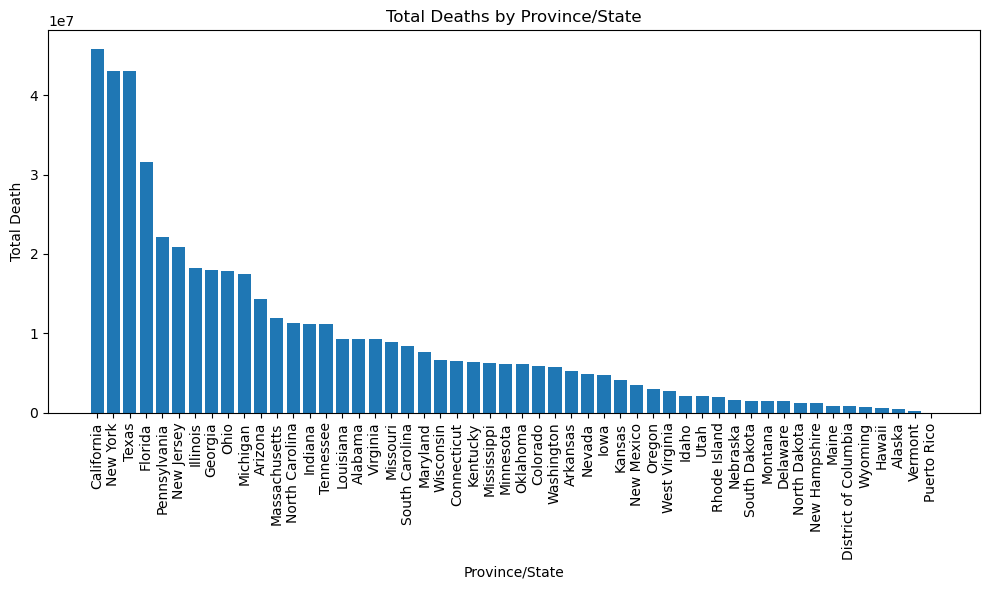

In [77]:
# Create a bar plot to show the states with the most deaths
plt.figure(figsize=(10, 6))
plt.bar(state_df['Province/State'], state_df['Total Death'])
plt.xlabel('Province/State')
plt.ylabel('Total Death')
plt.title('Total Deaths by Province/State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [78]:
# Calculate the percentage of deaths for each province/state
total_deaths = state_df['Total Death'].sum()
state_df['Percentage'] = (state_df['Total Death'] / total_deaths) * 100 
state_df.head()

,Province/State,Total Death,Percentage
4,California,45862661,9.417217
32,New York,43051578,8.840002
44,Texas,42974572,8.824190
9,Florida,31621670,6.493041
38,Pennsylvania,22190194,4.556427


In [82]:
#  new Provinces/States with deaths is less than2% of the total deaths 
state_df[state_df['Percentage'] < 2]['Province/State'].nunique()

37

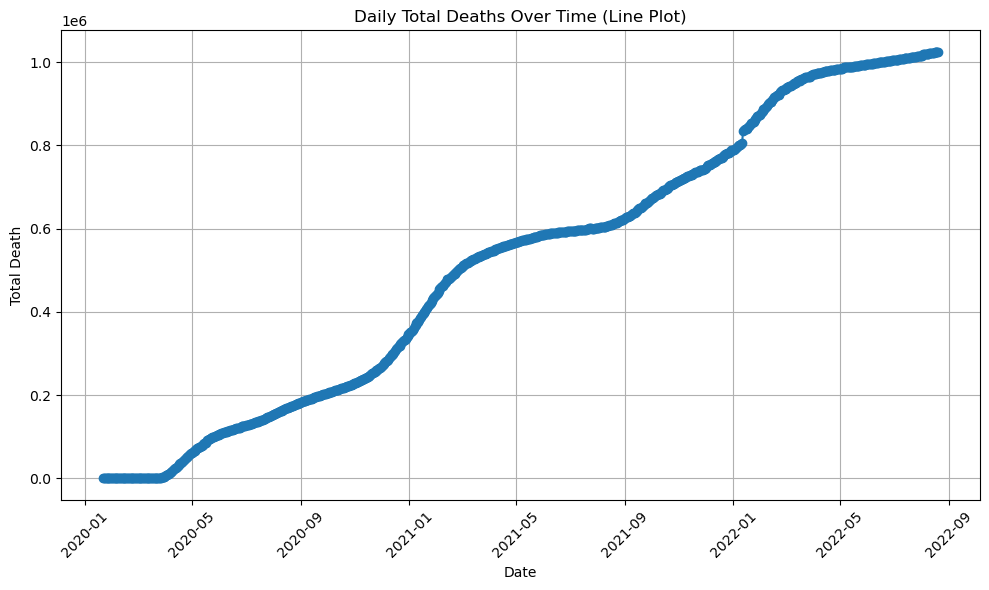

In [79]:

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by 'Date' and calculate the sum of 'Total Death' for each date
daily_death = df.groupby('Date')['Total Death'].sum().reset_index()

# Create a line plot (time series plot)
plt.figure(figsize=(10, 6))
plt.plot(daily_death['Date'], daily_death['Total Death'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Death')
plt.title('Daily Total Deaths Over Time (Line Plot)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

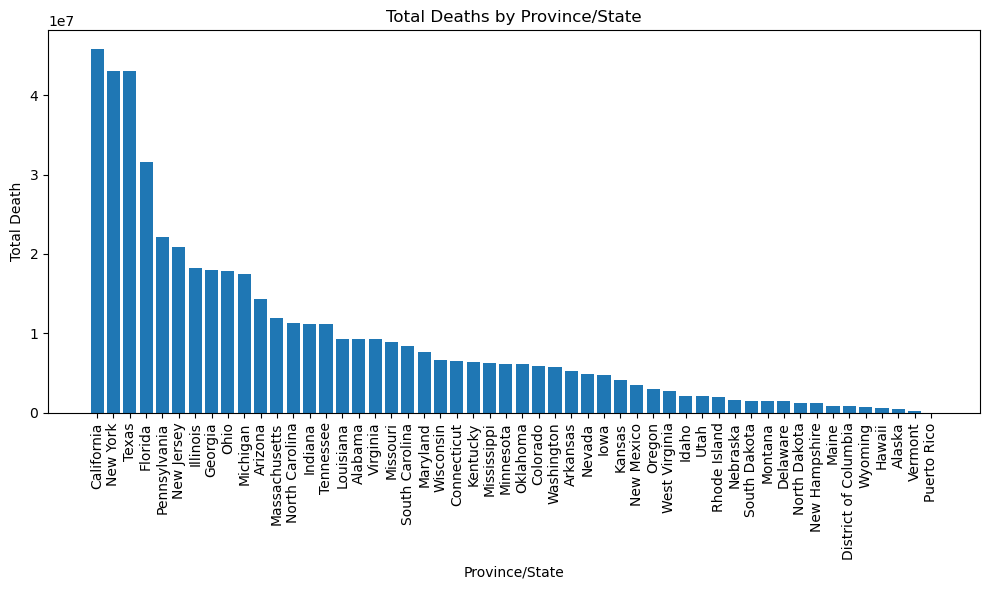

In [80]:
# Group the data by 'Province/State' and calculate the sum of 'Total Death' for each state
state_death = df.groupby('Province/State')['Total Death'].sum().reset_index()

# Sort the data by 'Total Death' in descending order
state_death_sorted = state_death.sort_values(by='Total Death', ascending=False)

# Create a bar plot to show the states with the most deaths
plt.figure(figsize=(10, 6))
plt.bar(state_death_sorted['Province/State'], state_death_sorted['Total Death'])
plt.xlabel('Province/State')
plt.ylabel('Total Death')
plt.title('Total Deaths by Province/State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [81]:
# Find the city with the most deaths and the fewest deaths

non_zero_death = df[df['Total Death'] > 0]

most_deaths_city = non_zero_death[non_zero_death['Total Death'] == non_zero_death['Total Death'].max()]['City/County/Borough/Region'].values[0]
least_deaths_city = non_zero_death[non_zero_death['Total Death'] == non_zero_death['Total Death'].min()]['City/County/Borough/Region'].values[0]

print(f'Most Deaths: {most_deaths_city} Death Count: {non_zero_death["Total Death"].max()}')
print(f'Least Deaths: {least_deaths_city} Death Count: {non_zero_death["Total Death"].min()}')

Most Deaths: Los Angeles Death Count: 32991
Least Deaths: Bryan Death Count: 1
